In [70]:
import pandas as pd

url =  "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/podmineny-vyber/podmineny-vyber/food_nutrient.csv"
url_branded_food = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/excs/znacky/branded_food.csv"
url_food_sample_100 = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/nacteni-dat/nacteni-dat/food_sample_100.csv"
url_food_other = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/sjednoceni-dat/food_other.csv"

food_nutrient  = pd.read_csv(url)
branded_food = pd.read_csv(url_branded_food)
food_sample_100 = pd.read_csv(url_food_sample_100)
food_other = pd.read_csv(url_food_other)
food = pd.concat([food_sample_100, food_other], ignore_index=True)
food_brands = pd.merge(food, branded_food, on="fdc_id")

In [72]:
# smazani dulplicit, abychom pro každou kombinaci fdc_id a name měli pouze jeden řádek.
food_nutrient  = food_nutrient.drop_duplicates(subset=["fdc_id", "name"])

In [71]:
food.head(5)

,fdc_id,data_type,description,food_category_id,publication_date
0,2644829,sub_sample_food,"lentils, dry",16.0,2023-10-19
1,2347263,sub_sample_food,heavy cream,1.0,2022-10-28
2,2261954,sub_sample_food,"Flour, potato",11.0,2022-04-28
3,321470,sub_sample_food,"Salt, Iodized",2.0,2019-04-01
4,322951,sub_sample_food,Hot dogs beef,7.0,2019-04-01


# Funkce PIVOT

In [91]:
# "přeskládání" tabulky aby byli slozky ve slpupcich
food_nutrient_pivot = pd.pivot( food_nutrient ,
    index = 'fdc_id',
    columns = 'name',
    values = 'amount'
)
food_nutrient_pivot.head()

name,"Ergosta-5,7-dienol",25-hydroxycholecalciferol,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-glucan,Beta-sitostanol,Beta-sitosterol,...,Vitamin K (phylloquinone),Water,Xylitol,Zeaxanthin,"Zinc, Zn",cis-Lutein/Zeaxanthin,cis-Lycopene,cis-beta-Carotene,trans-Lycopene,trans-beta-Carotene
fdc_id,,,,,,,,,,,,,,,,,,,,,
167551,NaN,NaN,0.392,0.0,0.489,1.80,0.572,NaN,NaN,NaN,...,3.9,3.30,NaN,NaN,1.24,NaN,NaN,NaN,NaN,NaN
167711,NaN,NaN,NaN,0.0,NaN,0.58,NaN,NaN,NaN,NaN,...,0.1,87.63,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN
168370,NaN,NaN,1.782,0.0,2.004,1.14,2.910,NaN,NaN,NaN,...,0.0,66.99,NaN,NaN,2.86,NaN,NaN,NaN,NaN,NaN
168460,NaN,NaN,0.355,0.0,0.585,1.10,1.148,NaN,NaN,NaN,...,70.6,79.45,NaN,NaN,1.04,NaN,NaN,NaN,NaN,NaN
168526,NaN,NaN,NaN,NaN,0.222,1.24,NaN,NaN,NaN,NaN,...,NaN,75.48,NaN,NaN,1.03,NaN,NaN,NaN,NaN,NaN


In [123]:
food_nutrient_pivot.columns

Index(['fdc_id', ' Ergosta-5,7-dienol', '25-hydroxycholecalciferol', 'Alanine',
       'Alcohol, ethyl', 'Arginine', 'Ash', 'Aspartic acid', 'Beta-glucan',
       'Beta-sitostanol',
       ...
       'data_source', 'package_weight', 'modified_date', 'available_date',
       'market_country', 'discontinued_date', 'preparation_state_code',
       'trade_channel', 'short_description', 'protein_and_fiber'],
      dtype='object', length=230)

In [93]:
food_brands.head(2)

,fdc_id,data_type,description,food_category_id,publication_date,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,...,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
0,1106032,branded_food,"Chicken, FC Beer Battered Boneless Wing Fritte...",NaN,2020-11-13,BRAKEBUSH BROTHERS INC.,NaN,NaN,10038034720202,INGREDIENTS: BONELESS CHICKEN BREAST MEAT WITH...,...,Meat/Poultry/Other Animals Prepared/Processed,GDSN,NaN,2020-09-03,2020-11-13,United States,NaN,NaN,NaN,NaN
1,1107191,branded_food,"MARINARA SAUCE, MARINARA",NaN,2020-11-13,Mahco Inc,NaN,NaN,877448001674,"TOMATO PUREE (TOMATOES), CARROTS, ONIONS, SUN-...",...,Prepared Pasta & Pizza Sauces,LI,NaN,2020-09-22,2020-11-13,United States,NaN,NaN,NaN,NaN


In [94]:
#pridani dalsich dat o potravinach
food_nutrient_pivot = pd.merge(food_nutrient_pivot, food_brands, on="fdc_id")
food_nutrient_pivot.head(2)

,fdc_id,"Ergosta-5,7-dienol",25-hydroxycholecalciferol,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-glucan,Beta-sitostanol,...,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
0,344774,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,...,Biscuits/Cookies (Shelf Stable),GDSN,NaN,2017-11-07,2019-04-01,United States,NaN,NaN,NaN,NaN
1,344980,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,NaN,...,Drinks Flavoured - Ready to Drink,GDSN,NaN,2018-02-06,2019-04-01,United States,NaN,NaN,NaN,NaN


# GRAF

Text(37.722222222222214, 0.5, 'Cholesterol')

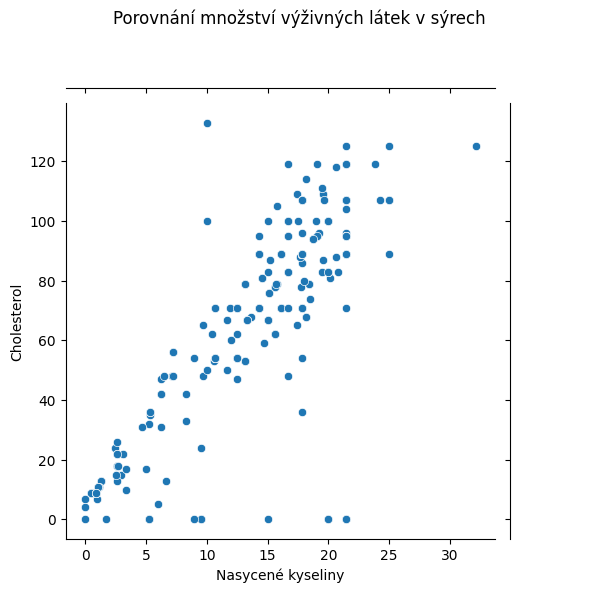

In [97]:
import seaborn as sns
cheese = food_nutrient_pivot[food_nutrient_pivot["branded_food_category"] == "Cheese"]
g = sns.JointGrid(cheese, x="Fatty acids, total saturated", y="Cholesterol")
g.plot_joint(sns.scatterplot)
g.fig.suptitle("Porovnání množství výživných látek v sýrech")
g.ax_joint.set_xlabel("Nasycené kyseliny")
g.ax_joint.set_ylabel("Cholesterol")

In [85]:
unique_names = food_nutrient['name'].unique().tolist()
print(unique_names)

['Fatty acids, total trans', 'Fatty acids, total polyunsaturated', 'Cholesterol', 'Potassium, K', 'Energy', 'Iron, Fe', 'Vitamin C, total ascorbic acid', 'Fatty acids, total saturated', 'Calcium, Ca', 'Fatty acids, total monounsaturated', 'Sodium, Na', 'Vitamin A, IU', 'Sugars, total including NLEA', 'Fiber, total dietary', 'Vitamin D (D2 + D3), International Units', 'Carbohydrate, by difference', 'Total lipid (fat)', 'Protein', 'Folic acid', 'Folate, DFE', 'Riboflavin', 'Thiamin', 'Vitamin B-12', 'Vitamin B-6', 'Phosphorus, P', 'Manganese, Mn', 'Magnesium, Mg', 'Niacin', 'Sugars, added', 'Folate, total', 'Selenium, Se', 'Pantothenic acid', 'Iodine, I', 'Zinc, Zn', 'Vitamin E', 'Fiber, soluble', 'Fiber, insoluble', 'Total sugar alcohols', 'Vitamin K (phylloquinone)', 'Copper, Cu', 'Carbohydrate, other', 'Molybdenum, Mo', 'Chromium, Cr', 'Biotin', 'Inulin', 'Vitamin E (alpha-tocopherol)', 'Xylitol', 'Choline, total', 'Chlorine, Cl', 'Lactose', 'Vitamin D3 (cholecalciferol)', 'Water', 'A

In [101]:
# fulltext hledacek
food_nutrient[food_nutrient['name'].str.contains('sugar', case=False, na=False)]['name'].unique()

array(['Sugars, total including NLEA', 'Sugars, added',
       'Total sugar alcohols', 'Sugars, Total'], dtype=object)

In [98]:
# jaká potravina má nejvíc Energy
pd.set_option('display.max_rows', None)
food_nutrient_pivot['protein_and_fiber']= food_nutrient_pivot['Protein'] +food_nutrient_pivot['Fiber, total dietary']
top100_energy = food_nutrient_pivot[
    ['branded_food_category', 'description', 'Energy','Protein','Fiber, total dietary', 'protein_and_fiber', "Fatty acids, total saturated",'Cholesterol', 'Sugars, Total']
].sort_values(by=['Cholesterol', 'protein_and_fiber'], ascending=[True, False])
top100_energy.head(20)

,branded_food_category,description,Energy,Protein,"Fiber, total dietary",protein_and_fiber,"Fatty acids, total saturated",Cholesterol,"Sugars, Total"
5252,Powdered Drinks,MATCHA GREEN TEA POWDER,300.0,50.00,50.0,100.00,0.00,0.0,NaN
8227,Rice,ORGANIC LONG GRAIN WHITE RICE,356.0,86.67,2.2,88.87,0.00,0.0,NaN
2276,"Energy, Protein & Muscle Recovery Drinks","RAW ORGANIC PROTEIN PLANT FORMULA UNFLAVORED, ...",393.0,78.57,3.6,82.17,0.00,0.0,NaN
7768,"Energy, Protein & Muscle Recovery Drinks",ORGANIC PEA & QUINOA PLANT PROTEIN POWDER,429.0,76.19,4.8,80.99,0.00,0.0,NaN
7799,"Energy, Protein & Muscle Recovery Drinks",ORGANIC PLANT-BASED PROTEIN + GREENS DELICIOUS...,393.0,65.57,9.8,75.37,0.00,0.0,NaN
4288,"Chips, Pretzels & Snacks",PREMIUM TOASTED BLACK EDAMAME,433.0,46.67,26.7,73.37,1.67,0.0,NaN
5160,Powdered Drinks,COCOTROPIC WILD SUPERFOOD ELIXIR REISHI MUSHRO...,286.0,28.57,42.9,71.47,7.14,0.0,NaN
9382,"Chips, Pretzels & Snacks","VANILLA FLAVORED PROTEIN & GREENS DRINK MIX, V...",400.0,66.67,3.3,69.97,0.00,0.0,NaN
7380,Nut & Seed Butters,"PEANUT BUTTER POWDER, PEANUT BUTTER",438.0,50.00,18.8,68.80,0.00,0.0,NaN
7996,Powdered Drinks,PEANUT BUTTER POWDER,438.0,50.00,18.8,68.80,0.00,0.0,NaN


In [115]:
food_nutrient_pivot["branded_food_category"].unique()

array(['Biscuits/Cookies (Shelf Stable)',
       'Drinks Flavoured - Ready to Drink',
       'Cereals Products - Ready to Eat (Shelf Stable)',
       'Cakes - Sweet (Frozen)', nan, 'Cereal/Muesli Bars',
       'Pasta by Shape & Type', 'Canned Meat', 'Cheese',
       'Ice Cream & Frozen Yogurt', 'Tea Bags', 'Cookies & Biscuits',
       'Mexican Dinner Mixes', 'Crusts & Dough', 'Cereal',
       'Crackers & Biscotti', 'Frozen Poultry, Chicken & Turkey',
       'Oriental, Mexican & Ethnic Sauces', 'Canned Vegetables',
       'Canned & Bottled Beans', 'Yogurt', 'Dips & Salsa',
       'Popcorn, Peanuts, Seeds & Related Snacks', 'Candy',
       'Pepperoni, Salami & Cold Cuts', 'Canned Fruit',
       "Frozen Appetizers & Hors D'oeuvres",
       'Cakes, Cupcakes, Snack Cakes',
       'Pickles, Olives, Peppers & Relishes', 'Canned Seafood',
       'Other Cooking Sauces', 'Butter & Spread',
       'Sausages, Hotdogs & Brats', 'Confection & Snacks',
       'Vegetable and Lentil Mixes', 'Entrees, S

In [118]:
food_nutrient_pivot[food_nutrient_pivot["branded_food_category"] == "Yogurt (Perishable)"][
    ['branded_food_category', 'description', 'Energy','Protein','Fiber, total dietary', 'protein_and_fiber', "Fatty acids, total saturated",'Cholesterol', 'Sugars, added']
].sort_values(by=['Cholesterol'], ascending= [True]).head(20)

,branded_food_category,description,Energy,Protein,"Fiber, total dietary",protein_and_fiber,"Fatty acids, total saturated",Cholesterol,"Sugars, added"
8508,Yogurt (Perishable),Mountain High Strawberry Original Whole Milk Y...,93.0,4.32,0.0,4.32,1.85,12.0,5.6


In [ ]:
bins_fat = [-1,1,float(inf)]
bins_fiber = [-1,5,float(inf)]
labels_fat =['low_fat','high_fat']
labels_fiber =['low_fibre','high_fibre']
food_nutrient_pivot["fat_category"] =pd.cut(food_nutrient_pivot['Fatty acids, total saturated'],bins=bins_fat,labels=labels_fat)
food_nutrient_pivot["fiber_category"] =pd.cut(food_nutrient_pivot['Fiber, total dietary'],bins=bins_fiber,labels=labels_fiber)

Text(37.722222222222214, 0.5, 'Bílkovina')

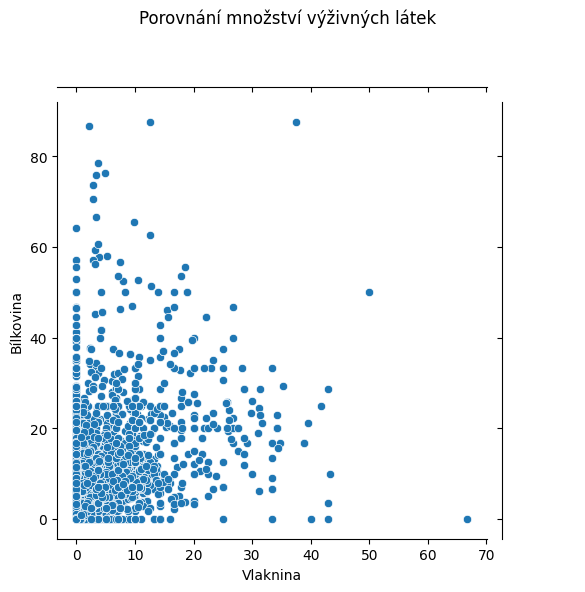

In [121]:
g = sns.JointGrid(food_nutrient_pivot, x="Fiber, total dietary", y="Protein")
g.plot_joint(sns.scatterplot)
g.fig.suptitle("Porovnání množství výživných látek ")
g.ax_joint.set_xlabel("Vlaknina")
g.ax_joint.set_ylabel("Bílkovina")